In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def prod(lst):
    return np.prod(lst)

In [13]:
likelihood = lambda a, b: ((1-a) * (1-b))**4 * (a * (1-b) + (1-a) * b)**9 * (a * b)**2

In [14]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X, Y = np.meshgrid(x, y)
Z = likelihood(X, Y)

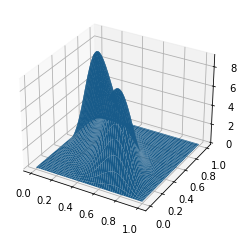

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contourf(X, Y, Z)
ax.plot_surface(X, Y, Z)
plt.show()

In [16]:
ergebnismenge = [('Z', 'Z'), ('Z', 'K'), ('K', 'Z'), ('K', 'K')]

a = 0.2
b = 0.5

p1 = {'K': a, 'Z': 1-a}
p2 = {'K': b, 'Z': 1-b}

korpus_X = dict.fromkeys(ergebnismenge, 0)
korpus_Y = { 0:2, 1:9, 2:4 }

In [27]:
ERG = {'K', 'Z'}

def beobachte(ergebnis): 
        return np.count_nonzero(np.array(ergebnis) == 'K')

def analysator(beobachtung):
    if (beobachtung == 0):
        return [('Z', 'Z')]
    elif (beobachtung == 1):
        return [('Z', 'K'), ('K', 'Z')]
    elif (beobachtung == 2):
        return [('K', 'K')]
    else:
        return None

def e_schritt(ergebnismenge, p, korpus_X, korpus_Y):
    for ergebnis in ergebnismenge:
        anteil = p[ergebnis] / sum([p[result] for result in analysator(beobachte(ergebnis))])
        korpus_X[ergebnis] = korpus_Y[beobachte(ergebnis)] * anteil
    return korpus_X

def unabhaengiges_product(p1, p2, ergebnismenge):
    p = dict.fromkeys(ergebnismenge, None)
    for (i,j) in ergebnismenge:
        p[(i,j)] = p1[i] * p2[j]
    return p

def marginalisierung(h, ergebnismenge):
    h1, h2 = dict.fromkeys(ERG, 0), dict.fromkeys(ERG, 0)
    
    for (i,j) in ergebnismenge:
        h1[i] = sum([h[(i,k)] for k in ERG])
        h2[j] = sum([h[(k,j)] for k in ERG])

    return h1, h2

def maximize_likelihood(ergebnismenge, korpus_X):
    pass

In [26]:
p = unabhaengiges_product(p1, p2, ergebnismenge)
korpus_X = e_schritt(ergebnismenge, p, korpus_X, korpus_Y)
print('X-Korpus: ', korpus_X)
korpus_X1, korpus_X2 = marginalisierung(korpus_X, ergebnismenge)
print('h1 = ', korpus_X1, '\nh2 = ', korpus_X2)

X-Korpus:  {('Z', 'Z'): 2.0, ('Z', 'K'): 7.2, ('K', 'Z'): 1.8, ('K', 'K'): 4.0}
h1 =  {'Z': 9.2, 'K': 5.8} 
h2 =  {'Z': 3.8, 'K': 11.2}


In [19]:
# class Experiment_unvollstaendige_Daten():
#     def __init__(self, ergebnismenge):
#         self.ergebnismenge = ergebnismenge
#         self.verteilung = dict.fromkeys(self.ergebnismenge, 0.0)
#         self.korpus_X = dict.fromkeys(self.ergebnismenge, 0)
#         self.likelihood = self.compute_likelihood()

#     def compute_likelihood(self):
#         self.likelihood = prod([self.verteilung[ergebnis]**self.korpus_X[ergebnis] for ergebnis in self.ergebnismenge]
# )

#     def set_beobachtungen(self, beobachtungen, korpus_Y):
#         self.beobachtungen = beobachtungen
#         self.korpus_Y = korpus_Y

#     def beobachte(self, ergebnis): 
#         return np.count_nonzero(np.array(ergebnis) == 'K')

#     def analysator(self, beobachtung):
#         if (beobachtung == 0):
#             return [('Z', 'Z')]
#         elif (beobachtung == 1):
#             return [('Z', 'K'), ('K', 'Z')]
#         elif (beobachtung == 2):
#             return [('K', 'K')]
#         else:
#             return None

#     def e_schritt(self, korpus_Y, p):
#         for ergebnis in self.ergebnismenge:
#             anteil = p[x] / sum([p[result] for result in self.analysator(self.beobachte(ergebnis))])
#             self.korpus_X[ergebnis] = korpus_Y[self.beobachte(ergebnis)] * anteil
        
#         self.compute_likelihood()

    

#     def __str__(self):
#         return str(self.korpus_X) + '\nmit verteilung \n' + str(self.verteilung) + '\nund likelihood \n' + str(self.likelihood)

In [20]:
# a = 0.2
# b = 0.5
# ergebnismenge = [('Z', 'Z'), ('Z', 'K'), ('K', 'Z'), ('K', 'K')]
# verteilung = { ('Z', 'Z'): (1-a) * (1-b), ('Z', 'K'): (1-a)*b, ('K', 'Z'):a*(1-b), ('K', 'K'):a*b}
# beobachtungen = [0, 1, 2]
# korpus_Y = { 0:2, 1:9, 2:4 }

# ex = Experiment_unvollstaendige_Daten(ergebnismenge)
# ex.set_beobachtungen(beobachtungen, korpus_Y)
# ex.e_schritt(korpus_Y, verteilung)
# print(ex)